# Análise Exploratória dos Dados

In [ ]:
# importando biblitoecas
import warnings # oculta avisos
import numpy as np # manipulação numérica e de matrizes
import pandas as pd # manipulação de dados
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore')

In [6]:
# importando conjunto de dados
df = pd.read_csv('..\\data\\processed\\clientes_tratados.csv')

In [7]:
df.head()

,id_cliente,estado,data_inicio,valor_mensal,status,idade_cliente,tempo_cliente_dias,faixa_etaria,ddd,regiao
0,3,ES,2025-06-12,166.97,inadimplente,37,54,30-39,41,sudeste
1,4,RO,2025-07-29,53.01,inadimplente,18,7,10-19,51,norte
2,5,PI,2025-01-29,141.25,inadimplente,45,188,40-49,81,nordeste
3,6,PR,2025-03-15,118.85,inadimplente,37,143,30-39,31,sul
4,7,AL,2025-04-06,126.73,inadimplente,51,121,50-59,21,nordeste


In [8]:
# resumo estatístico das variáveis numéricas
df.describe()

,id_cliente,valor_mensal,idade_cliente,tempo_cliente_dias,ddd
count,496.000000,496.000000,496.000000,496.000000,496.000000
mean,252.417339,124.435685,44.326613,181.447581,53.072581
std,143.464891,42.141195,15.350392,102.484358,24.995652
min,3.000000,50.030000,18.000000,3.000000,11.000000
25%,128.750000,88.152500,31.000000,89.750000,31.000000
50%,252.500000,122.500000,45.500000,188.000000,51.000000
75%,376.250000,160.485000,58.000000,267.250000,80.000000
max,500.000000,199.520000,69.000000,365.000000,90.000000


- O valor mensal varia entre 50 e 200 reais.
- Clientes variam entre 18 a 69 anos de idade.
- Os clientes analisados possuem de 3 dias a 1 ano do nosso serviço.

___

## Análise Univariada

**Qual a taxa de inadimplência total?**

In [9]:
df.status.value_counts(normalize=True)

adimplente      0.725806
inadimplente    0.274194
Name: status, dtype: float64

- Aproximadamente 28%

**Como está a distribuição por estado?**

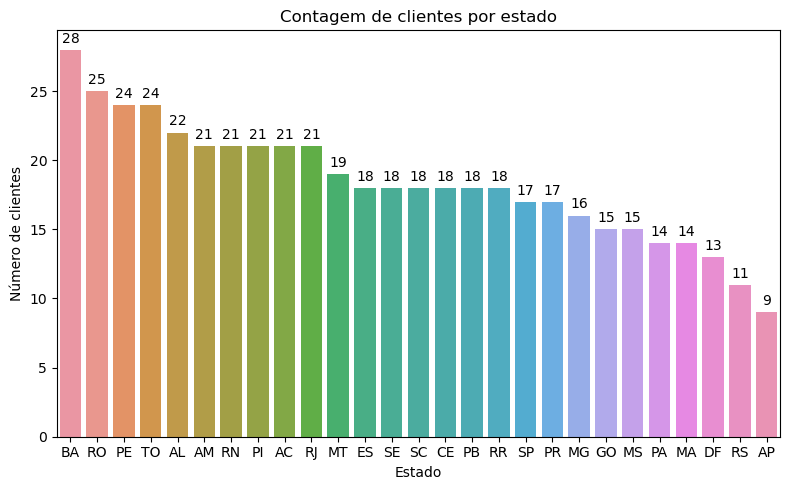

In [10]:
ordem = df['estado'].value_counts().index

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='estado', order=ordem)

# adiciona os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Contagem de clientes por estado')
plt.xlabel('Estado')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

- Bahia é o estado com maior quantidade de clientes, seguido de Roraima, Pernambuco e Tocantins. Rio Grande do Sul e Amapá são os dois estados com menos quantidade de clientes.
- Vale lembrar que esses dados possívelmente se tratam de uma amostra, e provavelmente não representam o perfil total da população.

**Análise por região**

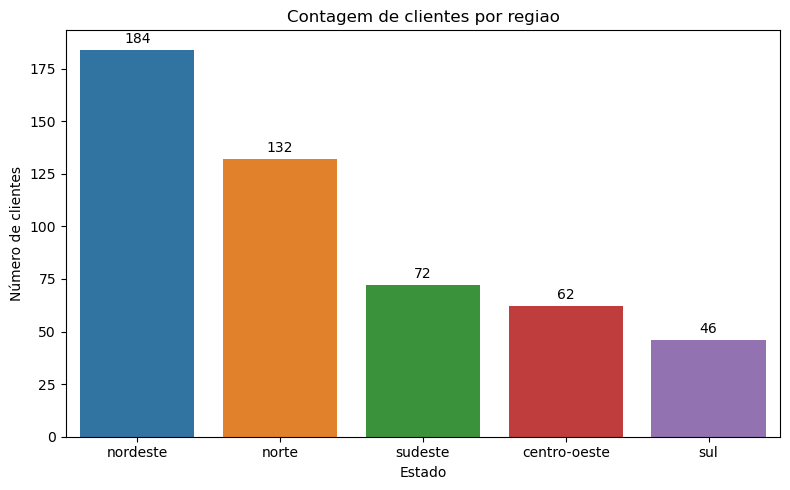

In [11]:
ordem = df['regiao'].value_counts().index

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='regiao', order=ordem)

# adiciona os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Contagem de clientes por regiao')
plt.xlabel('Estado')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

- A maior concentração de clientes está na região Nordeste, seguido da região Norte.
- Possuímos poucos clientes no Sul, se comparado ao nosso principal grupo que é o Nordeste, equivale a aproximadamente 25% do grupo.

**Como se comporta a distribuição de Valor Mensal?**

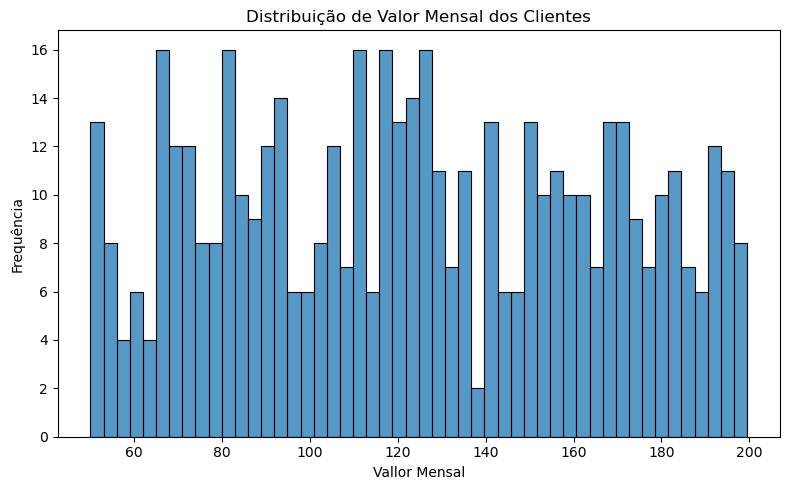

In [ ]:
# exibe gráfico de histograma
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='valor_mensal', bins=50, kde=False)
plt.title('Distribuição de Valor Mensal dos Clientes')
plt.xlabel('Valor Mensal')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

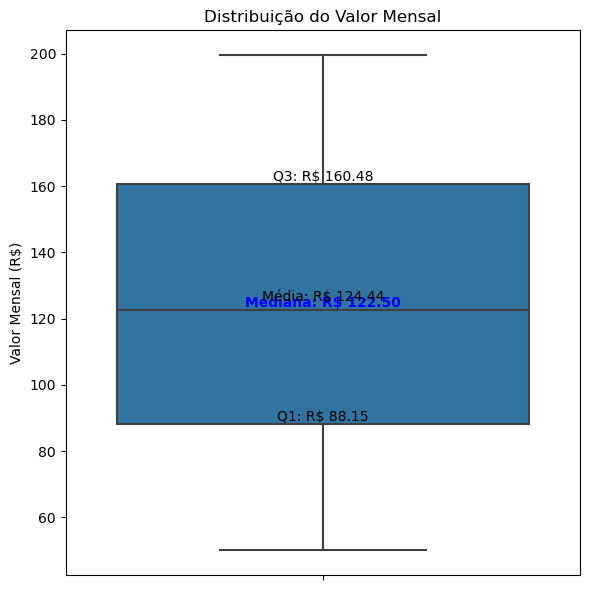

In [13]:
# gera gráfico de boxplot
# estatísticas
mediana = df['valor_mensal'].median()
media = df['valor_mensal'].mean()
q1 = df['valor_mensal'].quantile(0.25)
q3 = df['valor_mensal'].quantile(0.75)

# Exibe boxplot
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df, y='valor_mensal')

# Labels
ax.text(0, mediana, f'Mediana: R$ {mediana:.2f}', ha='center', va='bottom', color='blue', fontweight='bold')
ax.text(0, media,   f'Média: R$ {media:.2f}', ha='center', va='bottom', color='black')
ax.text(0, q1,      f'Q1: R$ {q1:.2f}', ha='center', va='bottom', color='black')
ax.text(0, q3,      f'Q3: R$ {q3:.2f}', ha='center', va='bottom', color='black')

plt.title('Distribuição do Valor Mensal')
plt.ylabel('Valor Mensal (R$)')
plt.tight_layout()
plt.show()


In [14]:
print(f"Desvio padrão dem Valor Mensal: {df['valor_mensal'].std()}")

Desvio padrão dem Valor Mensal: 42.14119526685333


- Os valores não são distribuídos uniformemente.
- A média e a mediana são próximas, isso indica que o desvio padrão dos valores é baixo.
- Até 25% dos clientes possuem um valor mensal de 88 reais
- Metade dos clientes possuem o valor mensal próximo aos 122 reais.
- 75% dos clientes mantém esse valor até 160 reais.
- Não possuímos outliers no Valor Mensal Total.
- O valor varia próximo de 42 reais por cliente.

**Analisando idade dos clientes**


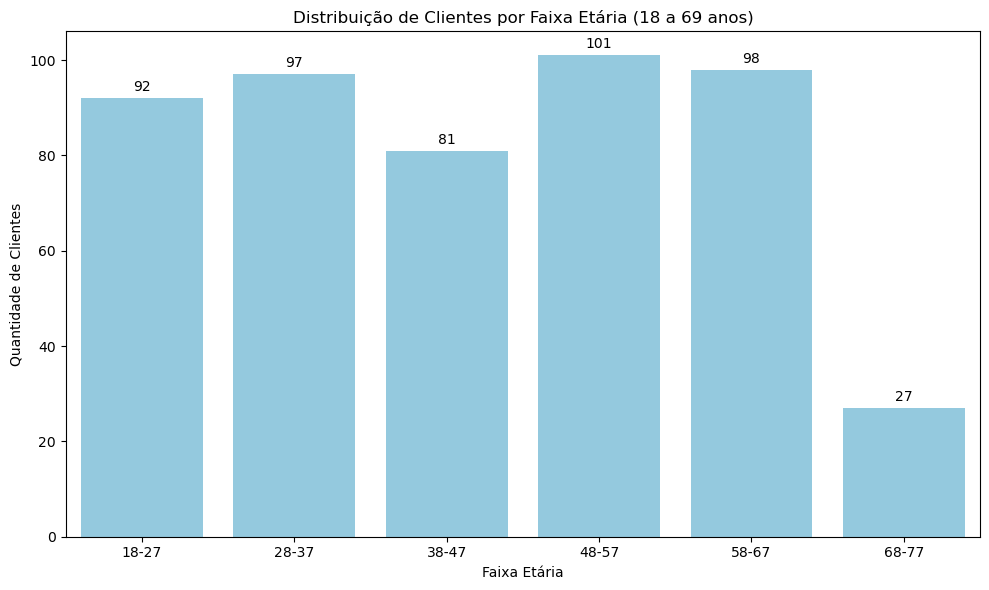

In [15]:
# gráfico de contagem

bins = list(range(18, 70, 10)) + [70]  # adiciona 70 para fechar o último intervalo
labels = [f"{i}-{i+9}" for i in bins[:-1]]

df['faixa_etaria'] = pd.cut(df['idade_cliente'], bins=bins, labels=labels, right=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ordem = labels  # garante que aparecem na ordem correta

ax = sns.countplot(data=df, x='faixa_etaria', order=ordem, color='skyblue')

# adiciona os rótulos com as quantidades
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Distribuição de Clientes por Faixa Etária (18 a 69 anos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()


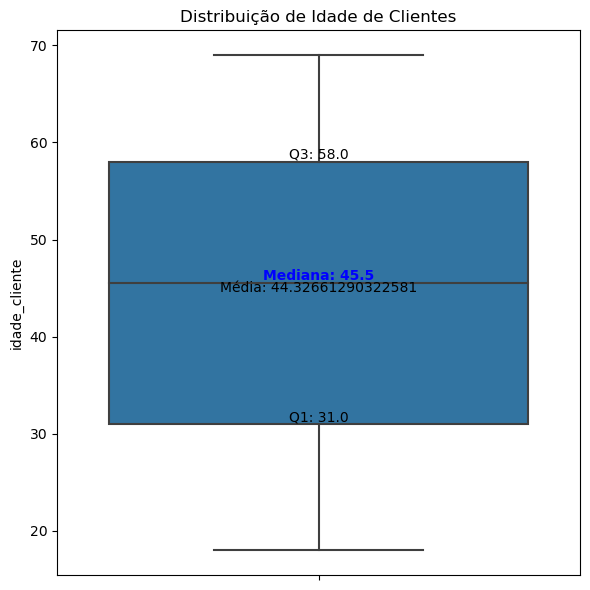

In [16]:
# gera gráfico de boxplot
# estatísticas
mediana = df['idade_cliente'].median()
media = df['idade_cliente'].mean()
q1 = df['idade_cliente'].quantile(0.25)
q3 = df['idade_cliente'].quantile(0.75)

# Exibe boxplot
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df, y='idade_cliente')

# Labels
ax.text(0, mediana, f'Mediana: {mediana}', ha='center', va='bottom', color='blue', fontweight='bold')
ax.text(0, media,   f'Média: {media}', ha='center', va='bottom', color='black')
ax.text(0, q1,      f'Q1: {q1}', ha='center', va='bottom', color='black')
ax.text(0, q3,      f'Q3: {q3}', ha='center', va='bottom', color='black')

plt.title('Distribuição de Idade de Clientes')
plt.ylabel('idade_cliente')
plt.tight_layout()
plt.show()

In [17]:
df.idade_cliente.describe()

count    496.000000
mean      44.326613
std       15.350392
min       18.000000
25%       31.000000
50%       45.500000
75%       58.000000
max       69.000000
Name: idade_cliente, dtype: float64

- Em média, o perfil de idade dos nossos clientes são de 45 anos.
- Metade dos clientes estão dentro de um intervalo de 31 a 58 anos de idade.
- A idade de cliente para cliente tem um desvio padrão de 15 anos.

**Análise de tempo em dias que é cliente**

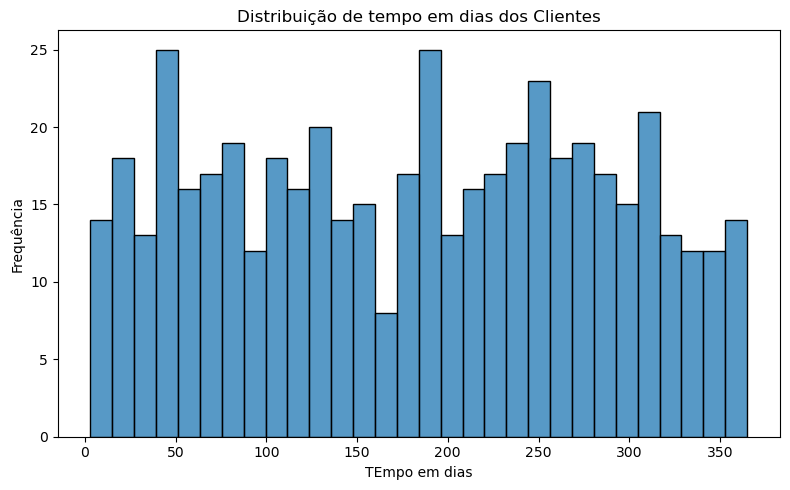

In [18]:
# exibe gráfico de histograma
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tempo_cliente_dias', bins=30, kde=False)
plt.title('Distribuição de tempo em dias dos Clientes')
plt.xlabel('TEmpo em dias')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

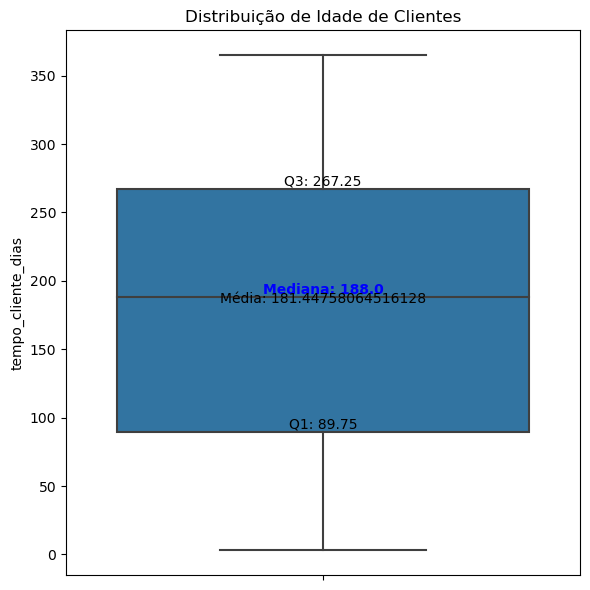

In [19]:
# gera gráfico de boxplot
# estatísticas
mediana = df['tempo_cliente_dias'].median()
media = df['tempo_cliente_dias'].mean()
q1 = df['tempo_cliente_dias'].quantile(0.25)
q3 = df['tempo_cliente_dias'].quantile(0.75)

# Exibe boxplot
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df, y='tempo_cliente_dias')

# Labels
ax.text(0, mediana, f'Mediana: {mediana}', ha='center', va='bottom', color='blue', fontweight='bold')
ax.text(0, media,   f'Média: {media}', ha='center', va='bottom', color='black')
ax.text(0, q1,      f'Q1: {q1}', ha='center', va='bottom', color='black')
ax.text(0, q3,      f'Q3: {q3}', ha='center', va='bottom', color='black')

plt.title('Distribuição de Idade de Clientes')
plt.ylabel('tempo_cliente_dias')
plt.tight_layout()
plt.show()

In [20]:
df.tempo_cliente_dias.describe()

count    496.000000
mean     181.447581
std      102.484358
min        3.000000
25%       89.750000
50%      188.000000
75%      267.250000
max      365.000000
Name: tempo_cliente_dias, dtype: float64

- A média e a mediana próximas a 188 dias indicam uma distribuição aproximadamente simétrica, sugerindo que não há grandes distorções nos tempos dos clientes.
- 25% dos clientes saem antes de 3 meses (Algo em torno de 90 dias).
- 75% dos clientes permanecem até 267 dias.
- A maioria dos clientes permanecem entre 3 a 9 meses.

Podemos investigar motivos de churn nos primeiros 3 meses.

____

## Análise Multivariada

**Inadimplência X Valor Mensal**

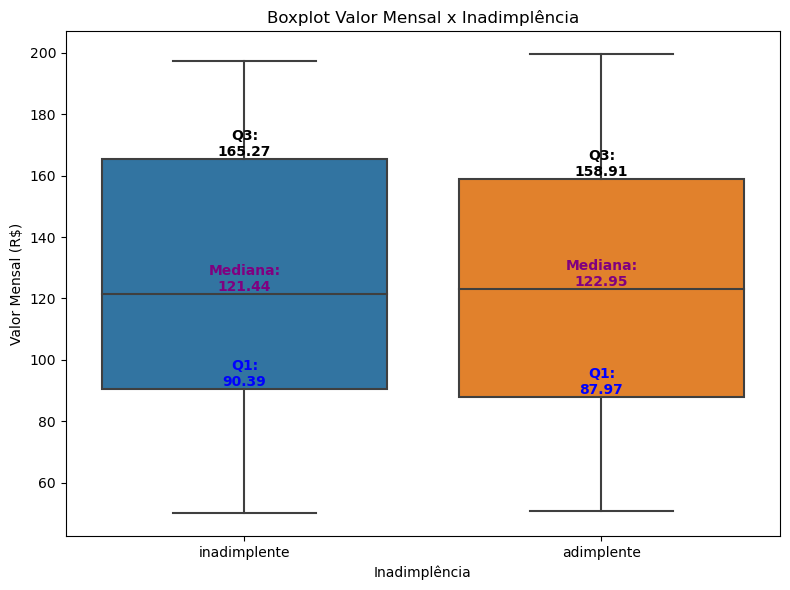

In [22]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='status', y='valor_mensal', data=df)

# calcular os quartis e mediana para cada grupo
stats = df.groupby('status')['valor_mensal'].describe()

# pega os labels
labels = list(stats.index)

# inverta os valores das anotações entre os grupos
for i, status in enumerate(labels):
    # Pega o índice do grupo oposto (0 vira 1, 1 vira 0)
    oposto = 1 - i
    q1 = stats.iloc[oposto]['25%']
    mediana = stats.iloc[oposto]['50%']
    q3 = stats.iloc[oposto]['75%']
    
    # anotar quartis e mediana no gráfico do grupo atual, mas com valores do grupo oposto
    ax.text(i, q1, f'Q1:\n{q1:.2f}', ha='center', va='bottom', color='blue', fontsize=10, fontweight='bold')
    ax.text(i, mediana, f'Mediana:\n{mediana:.2f}', ha='center', va='bottom', color='purple', fontsize=10, fontweight='bold')
    ax.text(i, q3, f'Q3:\n{q3:.2f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.title('Boxplot Valor Mensal x Inadimplência')
plt.xlabel('Inadimplência')
plt.ylabel('Valor Mensal (R$)')
plt.tight_layout()
plt.show()



In [23]:
df.groupby('status')['valor_mensal'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
adimplente,360.0,124.101167,41.675024,50.75,87.9650,122.955,158.9075,199.52
inadimplente,136.0,125.321176,43.495414,50.03,90.3875,121.435,165.2700,197.24


- Pessoas inadimplentes possuem um desvio padrão maior de valor mensal e um intervalo interquartil maior. Acima de 120 reais tendem a estar mais dispersos.
- Pessoas adimplentes tem valores distribuidos de forma mais uniforme em torno da mediana e média.

**Inadimplência X Região**

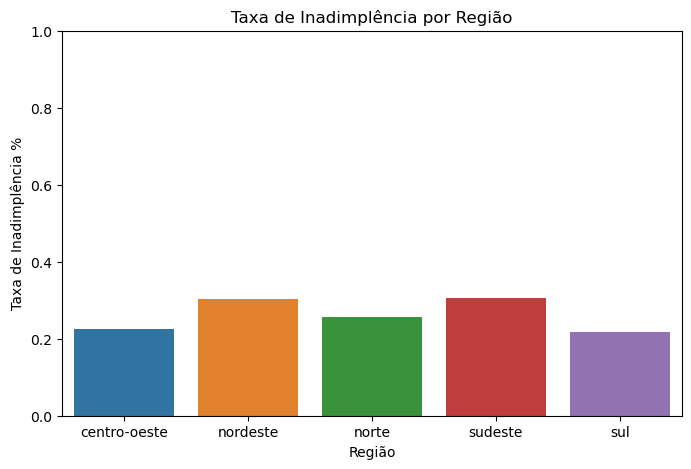

In [24]:
taxa_inad_regiao = df.groupby('regiao')['status'].apply(lambda x: (x == 'inadimplente').mean()).reset_index(name='taxa_inadimplencia')

plt.figure(figsize=(8,5))
sns.barplot(x='regiao', y='taxa_inadimplencia', data=taxa_inad_regiao)
plt.title('Taxa de Inadimplência por Região')
plt.ylabel('Taxa de Inadimplência %')
plt.xlabel('Região')
plt.ylim(0, 1)
plt.show()


- Nordeste e Sudeste apresentam as duas maiores taxas de indaimplência.

**Inadimplência X Tempo de cliente**

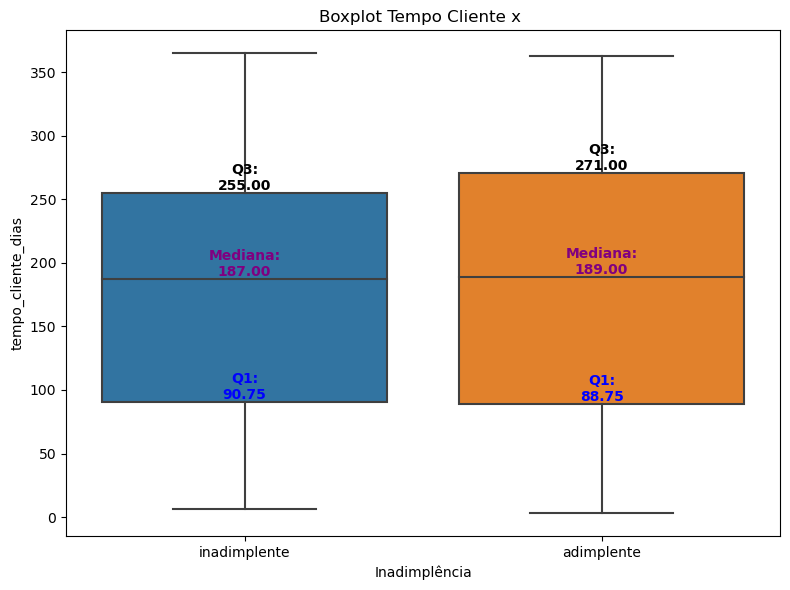

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='status', y='tempo_cliente_dias', data=df)

# calcular os quartis e mediana para cada grupo
stats = df.groupby('status')['tempo_cliente_dias'].describe()

# pega os labels
labels = list(stats.index)

# inverta os valores das anotações entre os grupos
for i, status in enumerate(labels):
    # Pega o índice do grupo oposto (0 vira 1, 1 vira 0)
    oposto = 1 - i
    q1 = stats.iloc[oposto]['25%']
    mediana = stats.iloc[oposto]['50%']
    q3 = stats.iloc[oposto]['75%']
    
    # anotar quartis e mediana no gráfico do grupo atual, mas com valores do grupo oposto
    ax.text(i, q1, f'Q1:\n{q1:.2f}', ha='center', va='bottom', color='blue', fontsize=10, fontweight='bold')
    ax.text(i, mediana, f'Mediana:\n{mediana:.2f}', ha='center', va='bottom', color='purple', fontsize=10, fontweight='bold')
    ax.text(i, q3, f'Q3:\n{q3:.2f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.title('Boxplot Tempo Cliente x Inadimplência')
plt.xlabel('Inadimplência')
plt.ylabel('tempo_cliente_dias')
plt.tight_layout()
plt.show()

In [26]:
df.groupby('status')['tempo_cliente_dias'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
adimplente,360.0,183.027778,104.587687,3.0,88.75,189.0,271.0,363.0
inadimplente,136.0,177.264706,96.945058,6.0,90.75,187.0,255.0,365.0


- O tempo de cliente é bem similar, não aparenta ser um fator chave para prever a inadimplência nesse cenário. Ou seja, clientes antigos e novos se distribuem quase igualmente neste cenário.
- Clientes mais antigos tendem a ser mais adimplentes.

**Idade X Inadimplência**

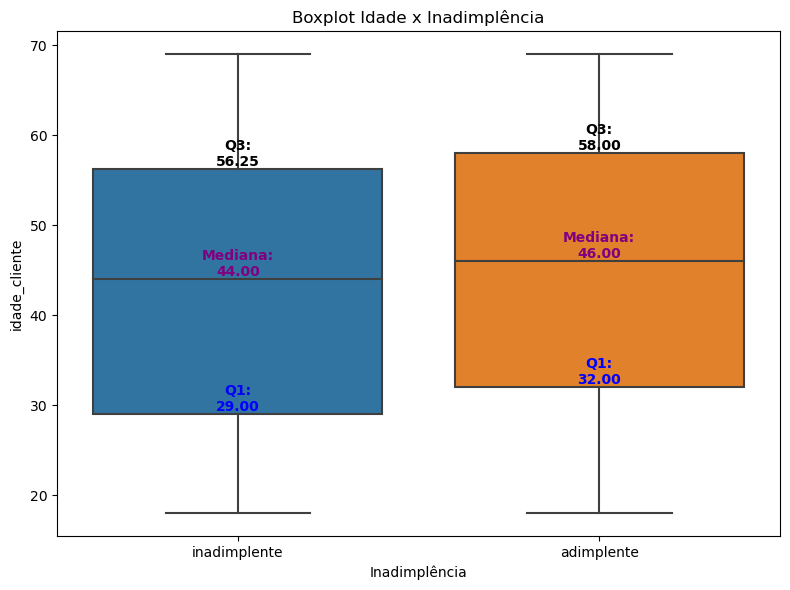

In [27]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='status', y='idade_cliente', data=df)

# calcular os quartis e mediana para cada grupo
stats = df.groupby('status')['idade_cliente'].describe()

# pega os labels
labels = list(stats.index)

# inverta os valores das anotações entre os grupos
for i, status in enumerate(labels):
    # Pega o índice do grupo oposto (0 vira 1, 1 vira 0)
    oposto = 1 - i
    q1 = stats.iloc[oposto]['25%']
    mediana = stats.iloc[oposto]['50%']
    q3 = stats.iloc[oposto]['75%']
    
    # anotar quartis e mediana no gráfico do grupo atual, mas com valores do grupo oposto
    ax.text(i, q1, f'Q1:\n{q1:.2f}', ha='center', va='bottom', color='blue', fontsize=10, fontweight='bold')
    ax.text(i, mediana, f'Mediana:\n{mediana:.2f}', ha='center', va='bottom', color='purple', fontsize=10, fontweight='bold')
    ax.text(i, q3, f'Q3:\n{q3:.2f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.title('Boxplot Idade x Inadimplência')
plt.xlabel('Inadimplência')
plt.ylabel('idade_cliente')
plt.tight_layout()
plt.show()

In [28]:
df.groupby('status')['idade_cliente'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
adimplente,360.0,44.861111,15.350234,18.0,32.0,46.0,58.00,69.0
inadimplente,136.0,42.911765,15.317127,18.0,29.0,44.0,56.25,69.0


- Pessoas inadimplêntes tem uma pequena tendência serem mais novas, entre 29 e 56 anos.
- Pessoas adimplentes aparentam ser um pouco mais velhas.

**Meses que é cliente X Inadimplência**

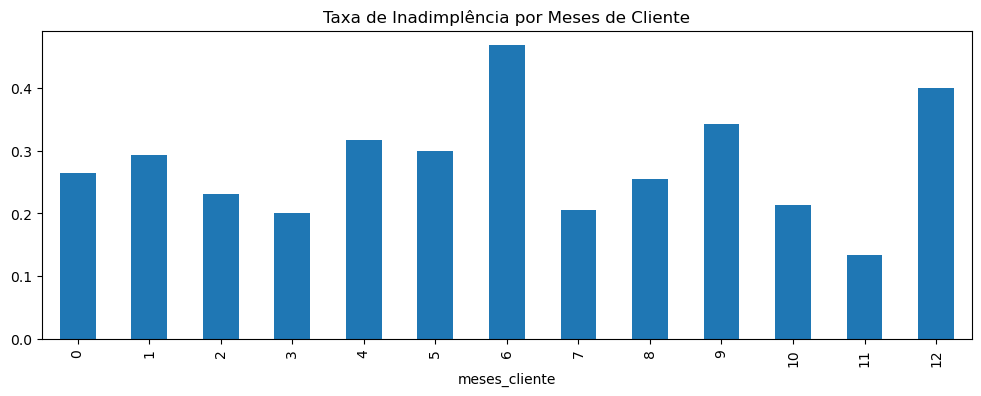

In [40]:
# criando variável de meses que é cliente para a análise
df['meses_cliente'] = (df['tempo_cliente_dias'] / 30).astype(int)

taxa_mes = df.groupby('meses_cliente')['status'].apply(lambda x: (x == 'inadimplente').mean())
taxa_mes.plot(kind='bar', figsize=(12,4), title='Taxa de Inadimplência por Meses de Cliente');

- Clientes com 6, 9 e 12 meses tem a maior taxa de inadimplência.
- Períodos de menor risco: 3, 7 e 11 meses.
- A inadimplência não é concentrada apenas no início, mas sim em alguns pontos críticos do ciclo de vida do cliente.
- Não há um padrão crescente ou decrescente contínuo, mas sim picos em meses estratégicos.

____

**Correlação das colunas numéricas**

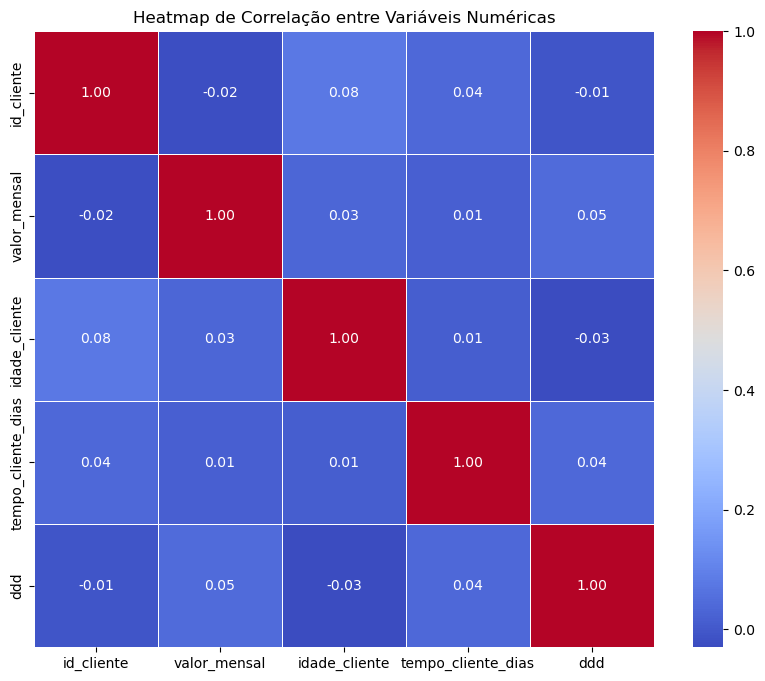

In [29]:
# Selecione só as colunas numéricas
df_numericas = df.select_dtypes(include=['number'])

correlacoes = df_numericas.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Heatmap de Correlação entre Variáveis Numéricas')
plt.show()


- As variáveis numéricas não se correlacionam.

___

**Qui-quadrado para associação de variáveis categóricas**

**Inadimplência X Região**

In [ ]:
tabela = pd.crosstab(df['status'], df['regiao'])

chi2, p, dof, expected = chi2_contingency(tabela)

print(f'Qui-quadrado: {chi2:.2f}')
print(f'Valor-p: {p:.4f}')
print(f'Graus de liberdade: {dof}')

Qui-quadrado: 2.85
Valor-p: 0.5824
Graus de liberdade: 4


- Comparando o p-valor de 0.58 ao nível de significância 0.05 temos um valor muito alto, ou seja, não há evidências estatísticas de associação entre as variáveis analisadas.

**Inadimplência X Estado**

In [ ]:
tabela = pd.crosstab(df['status'], df['estado'])

chi2, p, dof, expected = chi2_contingency(tabela)

print(f'Qui-quadrado: {chi2:.2f}')
print(f'Valor-p: {p:.4f}')
print(f'Graus de liberdade: {dof}')

Qui-quadrado: 19.63
Valor-p: 0.8086
Graus de liberdade: 26


- P-valor muito alto, logo não evidências estatísticas de associação entre as variáveis.

**Clientes que começam em um deterinado mês tem uma maior taxa de inadimplência?**

In [ ]:
# pegando apenas o mês de início do cliente
df['mes_inicio'] = pd.to_datetime(df['data_inicio']).dt.month

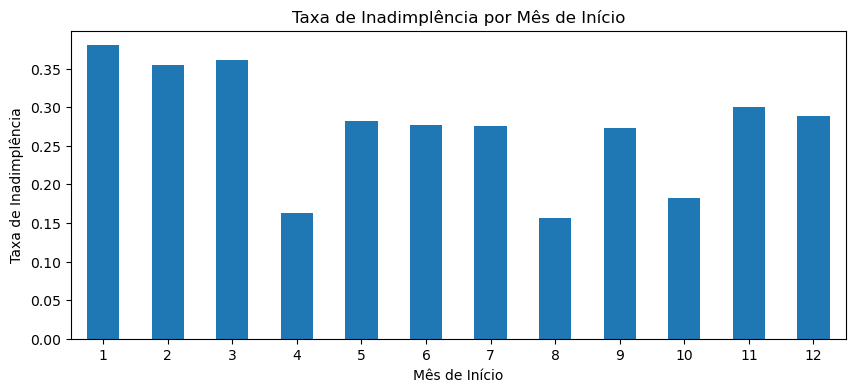

In [43]:
taxa_mes_inicio = df.groupby('mes_inicio')['status'].apply(lambda x: (x == 'inadimplente').mean())

taxa_mes_inicio.plot(kind='bar', figsize=(10,4))
plt.title('Taxa de Inadimplência por Mês de Início')
plt.xlabel('Mês de Início')
plt.ylabel('Taxa de Inadimplência')
plt.xticks(rotation=0)
plt.show()


- Pessoas que iniciam no começo do ano, entre Janeiro, Fevereiro e Março possuem a maior taxa de inadimplencia, acima de 35%.
- As menores taxas de inadimpência estão nos meses de Abril, Agosto e Outubro.

**Qual a taxa de inadimplência por faixa etária?**

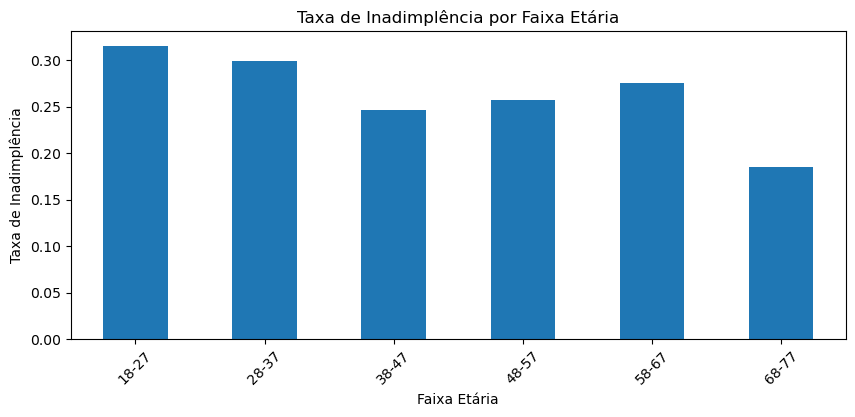

In [44]:
taxa_faixa_etaria = df.groupby('faixa_etaria')['status'].apply(lambda x: (x == 'inadimplente').mean())

taxa_faixa_etaria.plot(kind='bar', figsize=(10,4))
plt.title('Taxa de Inadimplência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Inadimplência')
plt.xticks(rotation=45)
plt.show()


- Pessoas com idade entre 18 e 37 anos tem a maior taxa de inadimplência. 
- Existe um risco entre adutos de meia idade.
- Idosos tendem a ser mais adimplentes.

**Faixa de valores mensais X Inadimplência**

In [45]:
bins = [50, 80, 110, 140, 170, 200]
labels = ['50-80', '81-110', '111-140', '141-170', '171-200']

# crindo coluna com faixa de valores
df['faixa_valor'] = pd.cut(df['valor_mensal'], bins=bins, labels=labels, include_lowest=True, right=True)

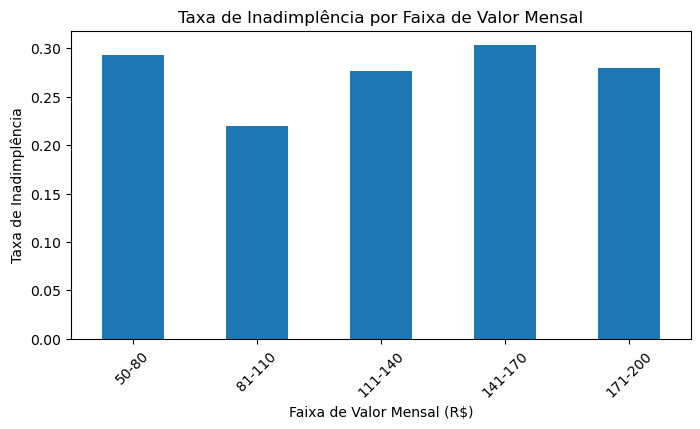

In [46]:
# calculando taxa de inadimplência
taxa_inad_faixa = df.groupby('faixa_valor')['status'].apply(lambda x: (x == 'inadimplente').mean())

taxa_inad_faixa.plot(kind='bar', figsize=(8,4))
plt.title('Taxa de Inadimplência por Faixa de Valor Mensal')
plt.xlabel('Faixa de Valor Mensal (R$)')
plt.ylabel('Taxa de Inadimplência')
plt.xticks(rotation=45)
plt.show()


- Pessoas com valor mensal entre 80 e 110 reais tem a menor taxa de inadimplência.

**Taxa de inadimplência por estado**

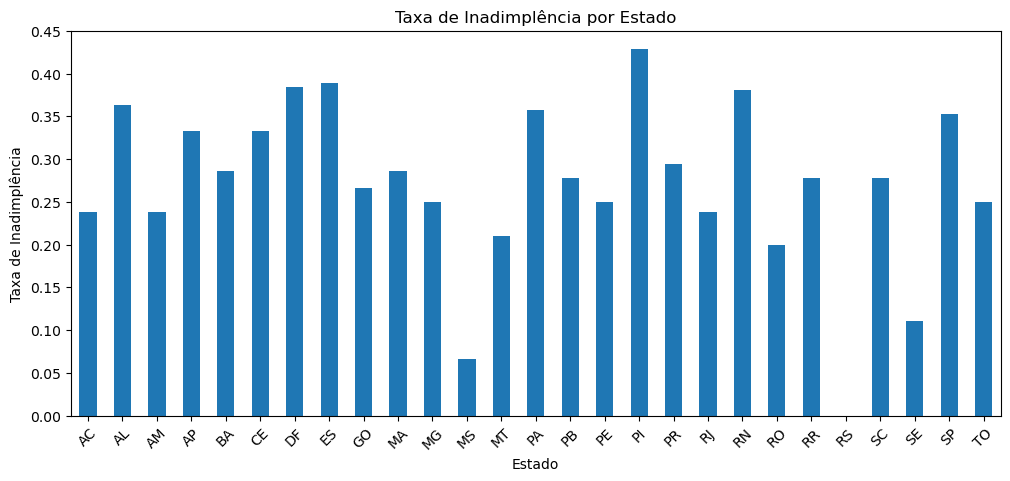

In [47]:
taxa_estado = df.groupby('estado')['status'].apply(lambda x: (x == 'inadimplente').mean())

taxa_estado.plot(kind='bar', figsize=(12,5))
plt.title('Taxa de Inadimplência por Estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de Inadimplência')
plt.xticks(rotation=45)
plt.show()


- Top 5 estados com maior taxa de inadimplência:
    - Piauí
    - Rio Grande do Norte
    - Espírito Santo
    - Brasília
    - Alagoas

- Top 5 estados com menos taxa de inadimplência:
    - Mato Grosso do Sul
    - Sergipe
    - Roraima
    - Mato Grosso
    - Rio de janeiro

In [ ]:
# exportando dataset
caminho = '..\\data\\processed\\clientes_tratados.csv'

df.to_csv(caminho, index=False)

____

**Conclusões:**
- Pessoas que moram nas regiões Nordeste e Sudeste possuem maior taxa de inadimplência que as outras regiões.
- Clientes com 6, 9 ou 12 meses tem a maior taxa de inadimplência, enquanto os clientes com 3, 7 e 11 meses a menor taxa.
- Nos 3 primeiros meses do ano se concentram a maior taxa de inadimplência.
- Abril, Agosto e Outubro são os meses que menor possuem taxas de inadimplência.
- Jovens entre 18 e 37 anos possuem a maior taxa de inadimplência. Meia idade tem risco médio, e pessoas mais velhas são mais adimplentes.
- A faixa de valor mensal com menos taxa de inadimplência é 80 a 110 reais.
- Não há nenhuma variável sozinha que explique muito a inadimplência.

**Possível perfil de cliente com maior risco de inadimplência:**
- Indivíduos jovens (com menos de 40 anos).
- Pessoas com 6, 9 ou 12 meses de tempo como cliente. Talvez pela necessidade da renovação do serviço.
- Se tornam no inicio do ano.
- Gastam mensalmente menos que 80 reais, ou mais que 110 reais.